In [11]:
#importar las librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import plotly.graph_objects as go
from collections import Counter

In [61]:
df = pd.read_csv('fifa_datos.csv')
df.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


## 1 Con los datos de Fifa, organizar a los jugadores de acuerdo al peso en las siguientes escalas y generar un cuadro tipo PIE

Debajo 125 Lbs. A
125-150  B
150-175  C
175 o superior  D

In [94]:
pesos=df['Weight'].str.replace("lbs","",regex=True)
pesos=pd.to_numeric(pesos, errors='coerce')

A=[]
B=[]
C=[]
D=[]
for i in pesos:
    if i < 125: #Valores menores a 125
        A.append(i)
    elif i > 124  and i < 151 :
        B.append(i)
    elif i > 149 and i < 176:
        C.append(i)
    elif i > 174 :
        D.append(i)
#print(A)
print(A)


[123.0, 123.0, 121.0, 123.0, 115.0, 121.0, 123.0, 117.0, 123.0, 123.0, 121.0, 121.0, 121.0, 121.0, 123.0, 123.0, 110.0, 121.0, 119.0, 123.0, 123.0, 121.0, 123.0, 123.0, 121.0, 123.0, 117.0, 121.0, 119.0, 117.0, 123.0, 117.0, 123.0, 123.0, 123.0, 110.0, 119.0, 117.0, 119.0, 117.0, 123.0]


In [95]:
print(len(A))
PA=len(A)

41


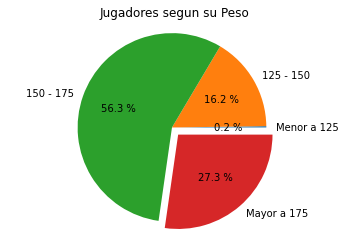

In [104]:
import matplotlib.pyplot as plt

valores = [len(A),len(B),len(C),len(D)]
nombres = ["Menor a 125","125 - 150","150 - 175","Mayor a 175"]
desfase = (0, 0, 0, 0.1)
plt.pie(valores, labels=nombres, autopct="%0.1f %%", explode=desfase)
plt.axis("equal")
plt.title('Jugadores segun su Peso')
plt.show()

## 2 Generar un grafico de barras (histograma) de acuerdo a su habilidad (Overall) en base a los siguientes segmentos contando el número de jugadores

* 40
* 50
* 60
* 70
* 80
* 90


Habilidad 40  :  Cantidades 0
Habilidad 50  :  Cantidades 103
Habilidad 60  :  Cantidades 649
Habilidad 70  :  Cantidades 889
Habilidad 80  :  Cantidades 143
Habilidad 90  :  Cantidades 5


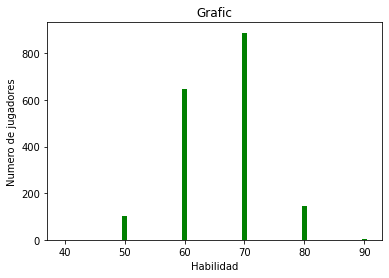

In [46]:
#print(df['Overall'])
cantidad=Counter(df['Overall'])
numeros = [40,50,60,70,80,90]
numeroJugadores=[]

for i in numeros:
    print('Habilidad',i,' : ','Cantidades',cantidad[i])
    numeroJugadores.append(cantidad[i])


plt.bar(numeros, numeroJugadores, color='green')
plt.title("Grafica")
plt.xlabel("Habilidad")
plt.ylabel("Numero de jugadores")
plt.show()



## 3 Investigar alguna herramienta o software que permita generar reportes con Python utilizando CodeLabs.
* DATAPANE
Permite realizar reportes de una manera rapida y facil permitiendo la generacion de pestañas, desplegables y de stamnera manerar generar reportes interactivos en la web. De cierta manera Datapane es basado en Reportlab.
* Instalacion
Se lo puede realizar mediante el comando :
    pip3 install -U datapane datapane hello-world
    conda install -c conda-forge "datapane>=0.12.0" datapane hello-world
* Ejemplo


In [106]:
import altair as alt
from vega_datasets import data
import datapane as dp

source = data.cars()

plot1 = alt.Chart(source).mark_circle(size=60).encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color='Origin',
  tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

dp.Report(
    dp.Text("## Hello world!"),
    dp.Plot(plot1),
    dp.DataTable(source)
).save(path="Hello_world.html")

ImportError: pyarrow>=1.0.0 is required for PyArrow backed StringArray.